# Introduction
1. Provide useful, analytical insights to business owners on Yelp and, based on these insights, propose data-driven, actionable decisions to said owners in order to improve their ratings in Yelp.
2. Propose a prediction model to predict the ratings of reviews based on the text and related attributes.

# Part 1: Advice for Traditional-American Restaurants

## Data Selection and Cleaning
### Raw data

There are 154,606 businesses which belong to 1,295 catogories and 5,364,626 reviews(3.43 GB). 

### Data cleaning on "Review" dataset

(1) Stopwords use nltk.stopwords.words except:

- Third person pronoun: he, she, it, they, their;

- Adverb of degree: few, most, more...;

- Negative: don't, didn't, doesn't, aren't...

(2) Pattern matching: words, abbreviation, [a-zA-Z]-[a-zA-Z],...,?,!;

(3) Substitute: he's to he, n'/n't to not, 'd to would;

(4) Delete: noun's, number+th/st/nd/rd;

(5) Change to lower case

(6) Tokenize using regular expression

(7) Add_neg to the words between not/never and the first punctuation;

(8) Use porter stemmer to do stem extracting, such as amazing to amaz;

(9) Use wordnet lemmatizer to lemmstize the verb to a normal form, such as loving to love.

### Data cleaning on "Businesses" dataset

(1) Seperate the catogories of businesses, find the businesses' id in each catogories;

(2) Change different expressions of attributes into same ones.

### Data selection

Among all the catogories, the number of restaurants is the most with 47,506 businesses. There are a total of restaurants in 85 countries, of which the largest number of businesses is the traditional American restaurants. Using "grep" command in bash we get the reviews we want.

We choose traditional American restaurants as an example to give some specific suggestions. Finally, we get 5,693 businesses and 845,941 reviews(503 MB).

## Make a Dictionary

1. Focus on some top words based on frequency, we get the most frequent 461 words among 245,344 words.

2. Count every word's frequency in every star (even if it appears many times in one review, we just focus on if it appears).

3. Use "Information gain" of each word to rank them.

### Information Gain

Information Gain = H(Y) - H(Y|X), where Y denotes class (star level), X is feature (word).

For example, the proportion of each star in whole dataset is $P_i$, i=1, 2, 3, 4, 5.

$H(Y)=-\sum_{i=1}^5 P_i log_2 P_i$

if we specify x as "good",

$H(Y|X)=\sum_{i=1}^2 P(X=x_i)(-\sum_{j=1}^5 P_{ij} log_2 P_{ij})$, where $x_i$=0, 1 (1 denotes review contains "good"), $P_{ij}$ is proportion of star j when X=$x_i$.

## Finding informative nouns
From the perspective of the restaurants' owners, the information of nouns can give them more pratical advice, so we only focus on nouns. And we want to use linear model to help us to interpret the influence of some important nouns.

Here is the analysis process:

1. We summarize the term frequency of each words and remain the words whose frequency larger than 4000, because we don't want too many useless words in our model, after this process, we have 1767 words left.
2. Then, we use information gain to rank the words and choose the top 1000 words.
3. Necxt, we choose nouns using *nltk.pos_tag* method and in the end we have 603 nouns left.
4. And we use all the review data of Traditional_American Restaurants and the 603 nouns to build a linear model.
5. Because the design matrix is so sparse, so it's hard to calculate p-value, so we use bootstrap to calculate the standard deviation of each word in our model by rebuild the model using random sample(size = 10000 observations) to build model 1000 times.
6. Then we rank the word by coefficient/sd and focus on the top 100 positive and negative words and choose some informative words manually.

## Attributes of Businesses

Attributes are from the "business" dataset that reflect various characteristics of the restaurants. There are 39 attributes in the dataset recording different aspects, such as "garage", "street", "validated", "lot" and "valet" in the "Business parking" attribute. We changed all the sub-attributes into independent columns and get 66 different attributes in total. However, "accept insurance", "byob" and "restaurants counter service" only has one level. Hence we drop them from our analysis. A list of most important attributes for improving the stars are selected based on ANOVA and CART.

### Classification and regression trees
#### Missing data
The overall missing rate is around 0.5, which is too high for any imputing method. Hence we first drop the attributes whose missing rate is greater than 0.5. Then we have 36 attributes left with overall missing rate 16.5%. The R package *rpart* applies surrogate splits to deal with missing data comfortably. With *rpart*, we can directly applies the dataset with missing values to the rpart function.

#### Tuning the rpart tree
For better interpretation and to avoid overfitting, we set the maximum depth of the tree to 3 while other parameters the same as default. 
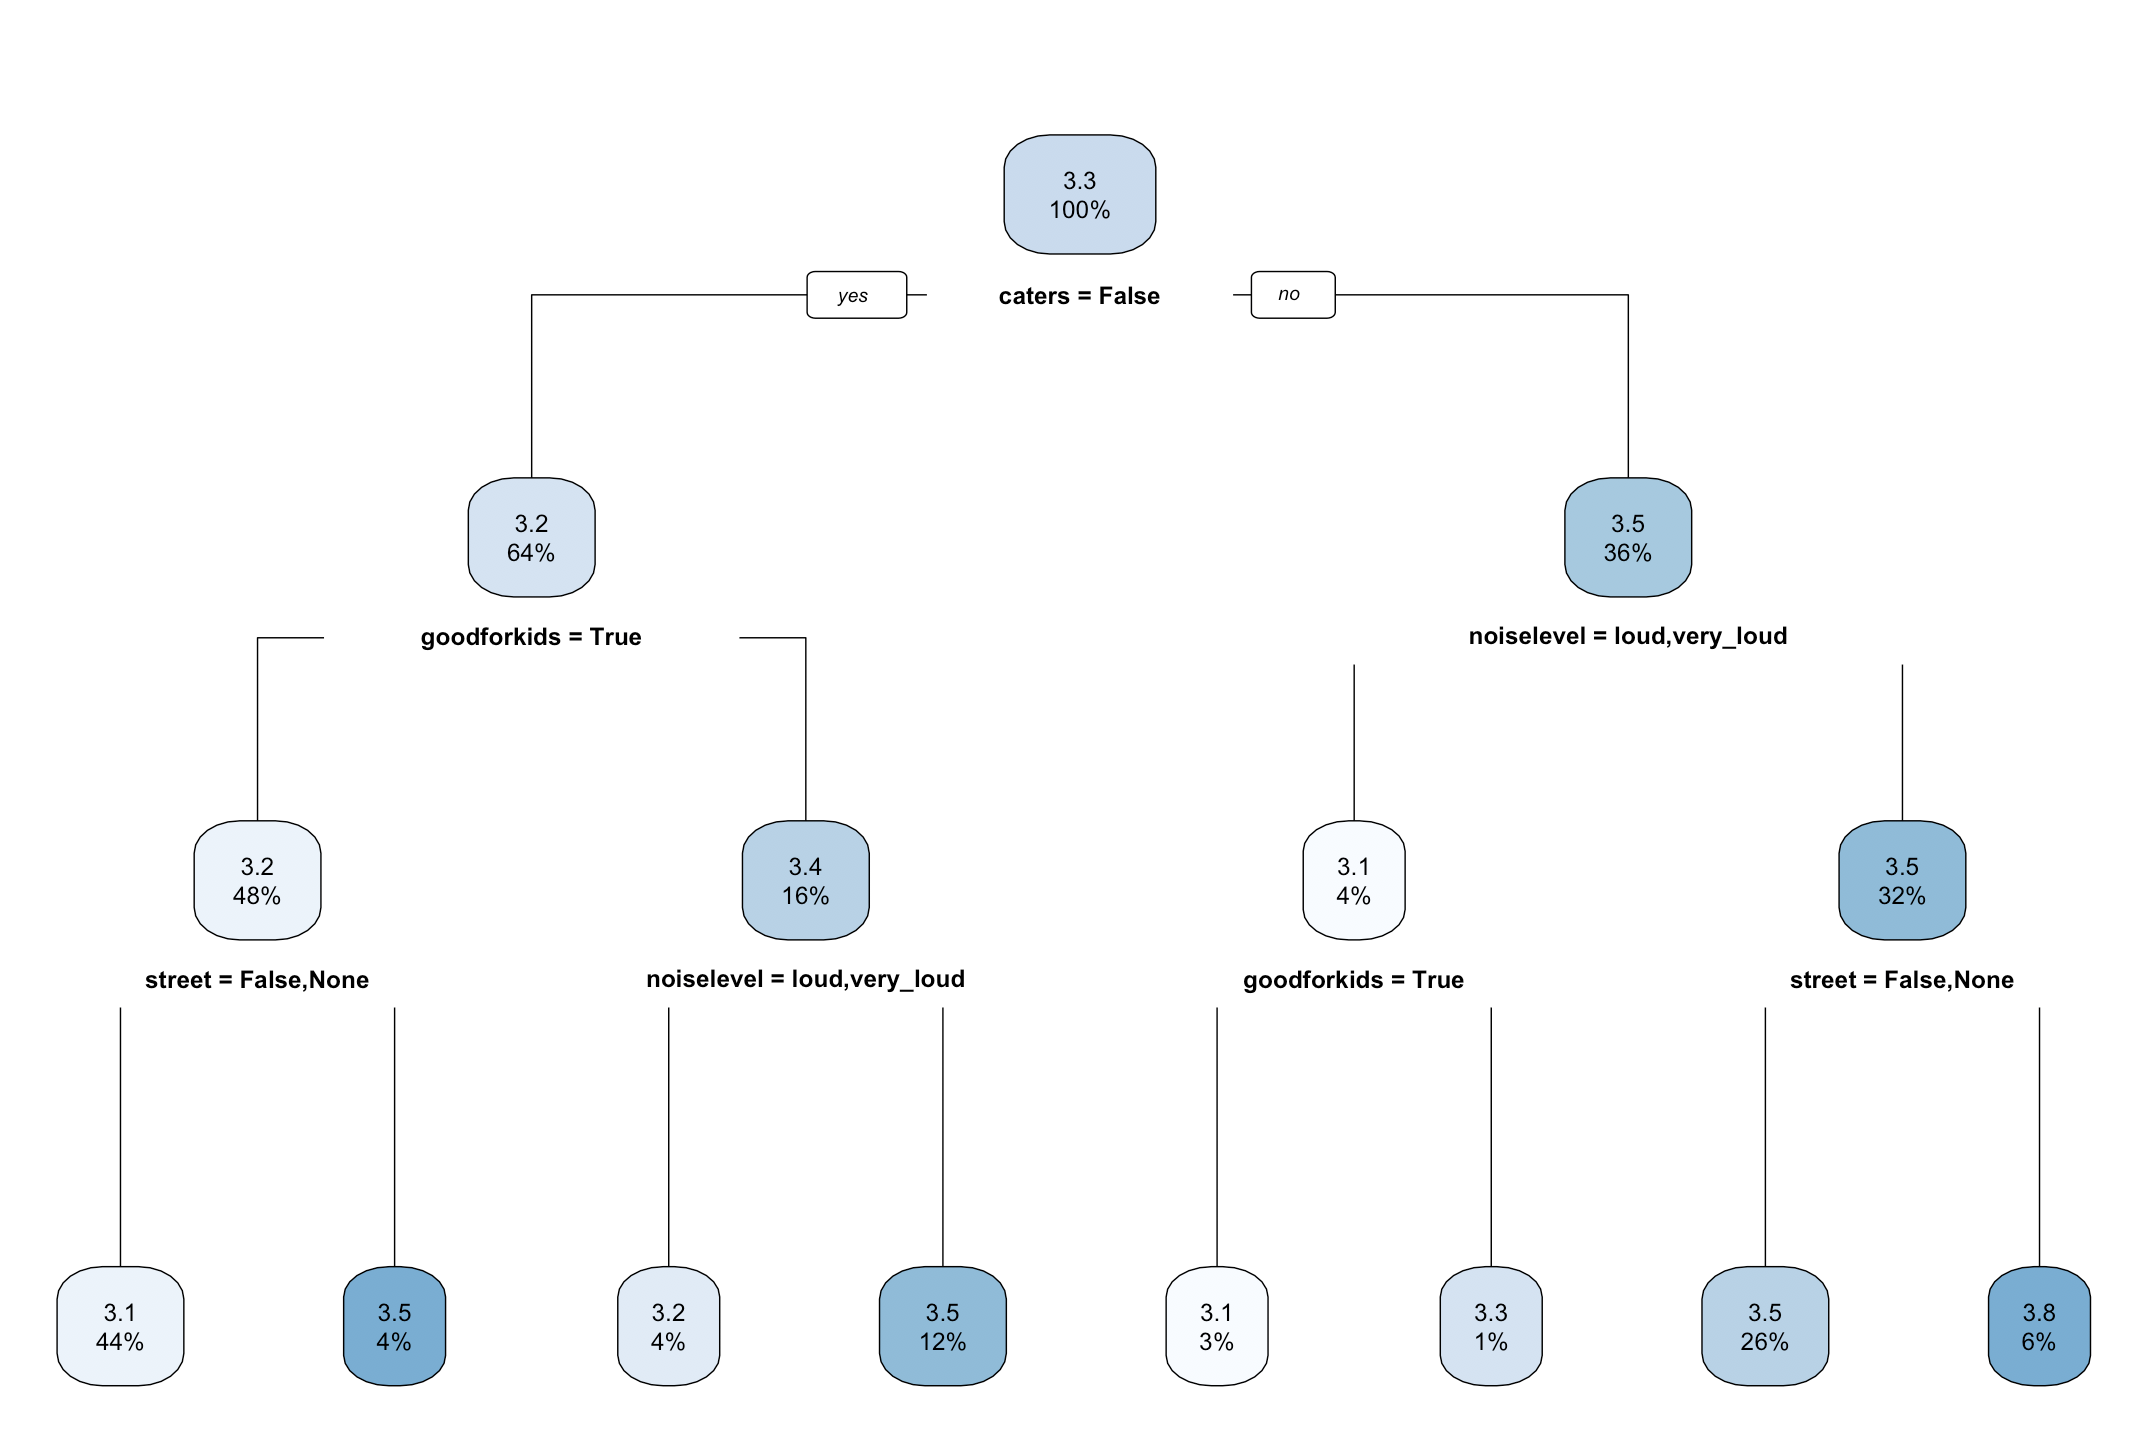
Also, by the output of the important score, we selected the top 5 important variables, which are: Caters, Parking(Street), Noiselevel, Goodforkids, RestaurantDelivery. RestaurantDelivery is selected but not in the main tree because it is used as a surrogate split.

### ANOVA test
 On the other hand, we also performed one-way ANOVA marginally for each attribute to see if an attribute is significant. This time, we set the missing values as a different level. Then we got a list of p-values based on the attribute we used. We ranked the p-values of each attribute from lowest to the highest, to discover that the previously top 5 attributes selected using *rpart* have the top 10 smallest p-values. Hence, it again confirms that the top 5 attributes are important indicators for review stars.

# Part 2: Prediction

We use the all the customer reviews to build a logistics regression model with 5 outcomes (1-5 star), and the final RMSE of the test set is 0.91986.

# Conclusion

1. 

2.

3.



## Group Member Contribution:

- Lize Du: Clean "review" data, make dictionary, put forward information gain, make word clouds and maps for first presentation, make prediction model of the ratings, write the jupyter notebook. 
- Linquan Ma: Extract specific reviews from all reviews, make plots for first presentation, use tree-methods to find important attributes, write the jupyter notebook and Demo for the Github repo. 
- Wenjia Xie: Clean "business" data, select the data we need, calculate the star for each traditional American restaurants, deal with the attributes, make slides for first presentation, write the jupyter notebook, 

## References:
- https://cran.r-project.org/web/packages/rpart/rpart.pdf
- http://www.nltk.org/book/
- https://arxiv.org/pdf/1709.08698.pdf

